## 1. Import the necessary packages to read in the data, plot, and create a linear regression model

In [36]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # package for doing plotting (necessary for adding the line)
import statsmodels.formula.api as smf # package we'll be using for linear regression
import numpy as np
import scipy as sp

## 2. Read in the hanford.csv file 

In [4]:
df = pd.read_csv("data/hanford.csv")
df

,County,Exposure,Mortality
0,Umatilla,2.49,147.1
1,Morrow,2.57,130.1
2,Gilliam,3.41,129.9
3,Sherman,1.25,113.5
4,Wasco,1.62,137.5
5,HoodRiver,3.83,162.3
6,Portland,11.64,207.5
7,Columbia,6.41,177.9
8,Clatsop,8.34,210.3


## 3. Calculate the basic descriptive statistics on the data

In [5]:
df.describe()

,Exposure,Mortality
count,9.000000,9.000000
mean,4.617778,157.344444
std,3.491192,34.791346
min,1.250000,113.500000
25%,2.490000,130.100000
50%,3.410000,147.100000
75%,6.410000,177.900000
max,11.640000,210.300000


## 4. Calculate the coefficient of correlation (r) and generate the scatter plot. Does there seem to be a correlation worthy of investigation?

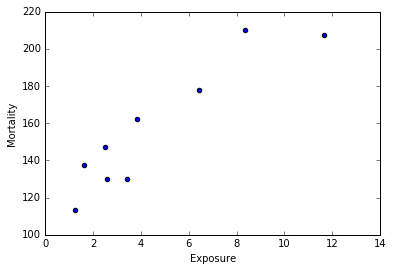

In [19]:
df.plot(kind='scatter', x='Exposure', y='Mortality')

In [11]:
r = df.corr()['Exposure']['Mortality']
r

0.92634482071736912

Yes, there seems to be a correlation wothy of investigation.

## 5. Create a linear regression model based on the available data to predict the mortality rate given a level of exposure

In [16]:
lm = smf.ols(formula="Mortality~Exposure",data=df).fit()
intercept, slope = lm.params


In [18]:
lm.params

Intercept    114.715631
Exposure       9.231456
dtype: float64

## 6. Plot the linear regression line on the scatter plot of values. Calculate the r^2 (coefficient of determination)

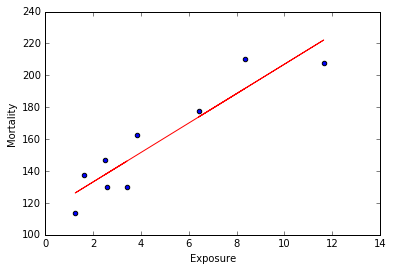

In [22]:
# Method 01 (What we've learned from the class)
df.plot(kind='scatter', x='Exposure', y='Mortality')
plt.plot(df["Exposure"],slope*df["Exposure"]+intercept,"-",color="red")

In [42]:
# Method 02 (Another version) _ so much harder ...than what we have learned

def plot_correlation( ds, x, y, ylim=(100,240) ):
    plt.xlim(0,14)
    plt.ylim(ylim[0],ylim[1])
    plt.scatter(ds[x], ds[y], alpha=0.6, s=50) 
    for abc, row in ds.iterrows():
        plt.text(row[x], row[y],abc )
    plt.xlabel(x)
    plt.ylabel(y)
    
    # Correlation 
    trend_variable = np.poly1d(np.polyfit(ds[x], ds[y], 1))
    trendx = np.linspace(0, 14, 4)
    plt.plot(trendx, trend_variable(trendx), color='r') 
    r = sp.stats.pearsonr(ds[x],ds[y])
    plt.text(trendx[3], trend_variable(trendx[3]),'r={:.3f}'.format(r[0]), color = 'r' )
    plt.tight_layout()

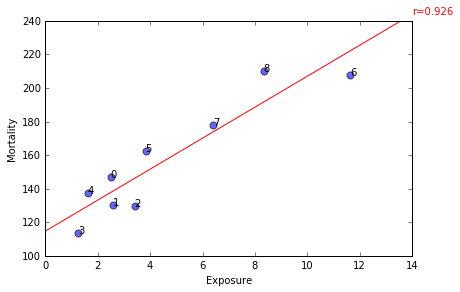

In [41]:
plot_correlation(df,'Exposure','Mortality')

In [12]:
r_squared = r **2
r_squared

0.85811472686989476

## 7. Predict the mortality rate (Cancer per 100,000 man years) given an index of exposure = 10

In [25]:
def predicting_mortality_rate(exposure):
    return intercept + float(exposure) * slope

In [26]:
predicting_mortality_rate(10)

207.03019352841989